<a href="https://colab.research.google.com/github/Silvarawenne/Projetos-Data-Science/blob/main/Projeto_Previsao_Precos_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Previsão de Preços de Imóveis
Este projeto utiliza o dataset Ames Housing do Kaggle para construir um modelo de machine learning que prevê o preço de venda de casas.

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawenneleite","key":"7d14ec2080b5a02128f78ed23b5ef541"}'}

In [8]:
# Cria a pasta .kaggle, move o arquivo e define as permissões
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
# Desconpactando arquivo .zip

!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
#Importando panda e carregando arquivos de treino para um DataFrame

import pandas as pd

df = pd.read_csv('train.csv')

print("Dados de treino carregados!As 5 primeiras linhas são:")
df.head()

Dados de treino carregados!As 5 primeiras linhas são:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
# Mostrando um resumo técnico da lista

print("/nResumo técnico do DataFrame:")
df.info()

/nResumo técnico do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 n

In [13]:
# Mostra as estatiscas descritivas
print("Estatisticas do preço de venda (salePrice):")
df['SalePrice'].describe()

Estatisticas do preço de venda (salePrice):


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


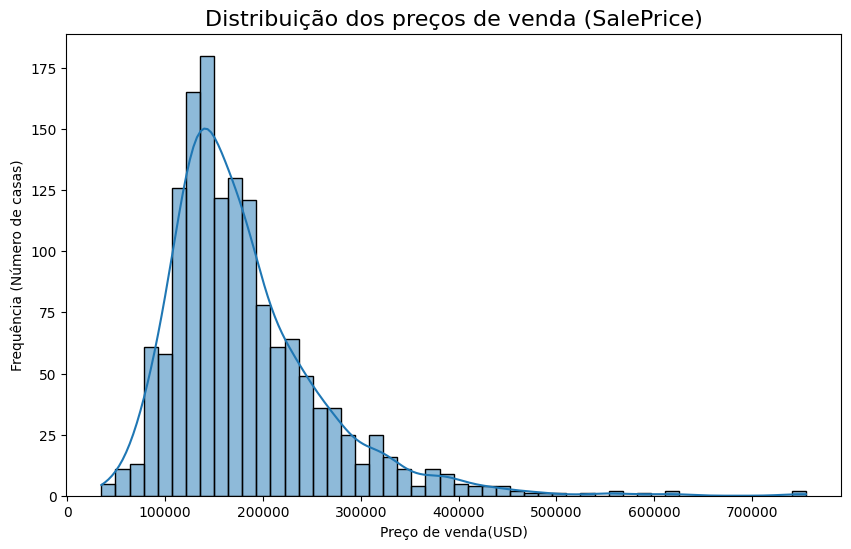

In [14]:
# Criando um gráfico para ver a distribuição de coluna "salePrices"
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribuição dos preços de venda (SalePrice)', fontsize=16)
plt.xlabel('Preço de venda(USD)')
plt.ylabel('Frequência (Número de casas)')
plt.show()

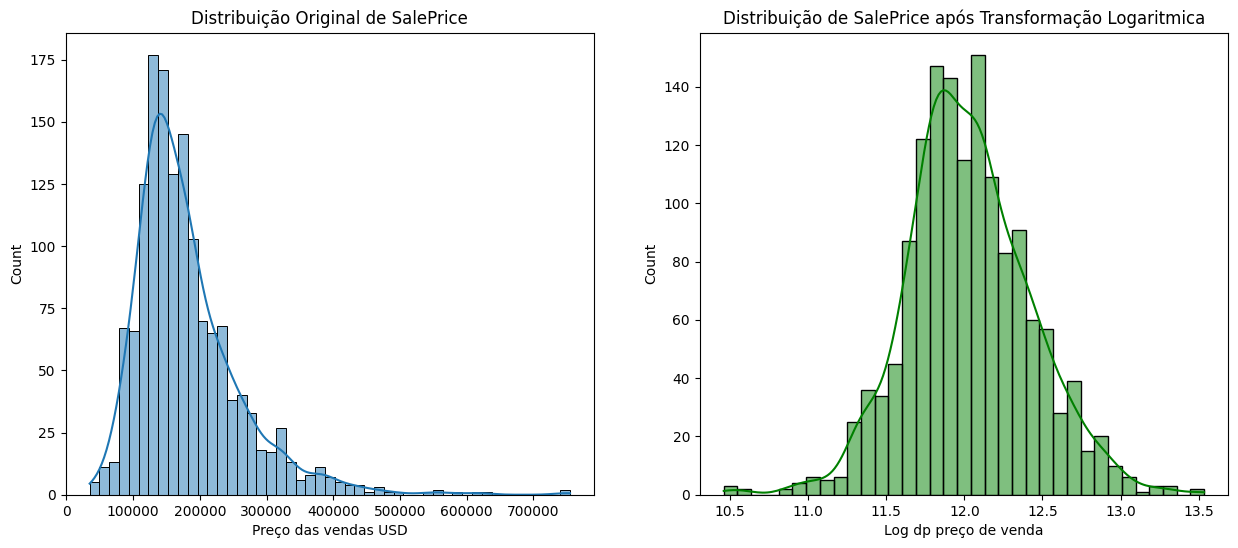

In [15]:
# Aplicando e transformando log na coluna salesprice e após isso criando uma figura com dois gráficos lado a lado

import numpy as np
df['SalePrice_log'] = np.log1p(df['SalePrice'])

fig, axes = plt.subplots(1,2,figsize=(15, 6))

sns.histplot(df['SalePrice'], kde= True, ax=axes[0])
axes[0].set_title('Distribuição Original de SalePrice')
axes[0].set_xlabel('Preço das vendas USD')

sns.histplot(df['SalePrice_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribuição de SalePrice após Transformação Logaritmica')
axes[1].set_xlabel('Log dp preço de venda')
plt.show()


## Análise Exploratória: Encontrando as Melhores Pistas
A seguir, investigamos a correlação entre as características da casa e o preço de venda.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlacoes = df.select_dtypes(include=['number']).corr()

print("Top 10 features mais correlacionados com o preço de venda:")
print(correlacoes['SalePrice'].sort_values(ascending=False).head(11))

Top 10 features mais correlacionados com o preço de venda:
SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
Name: SalePrice, dtype: float64


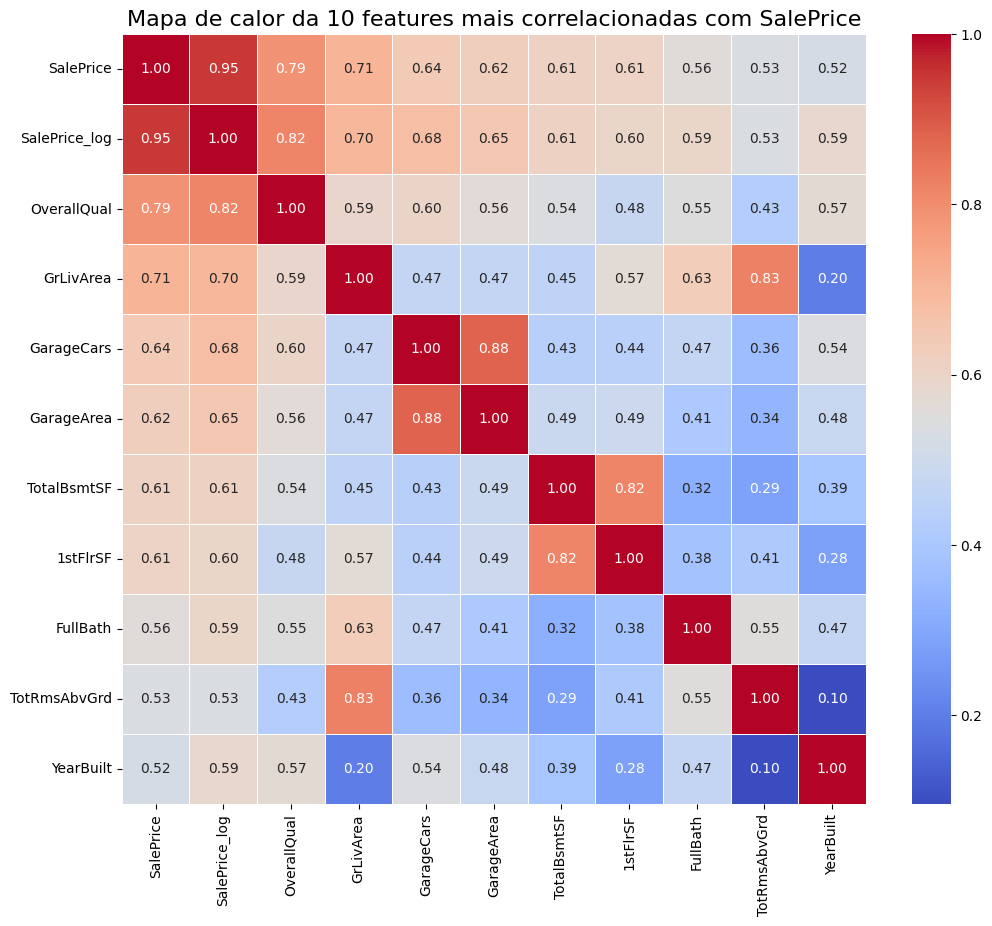

In [17]:
top_10_features = correlacoes['SalePrice'].sort_values(ascending=False).head(11).index
top_10_corr_matrix = df[top_10_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor da 10 features mais correlacionadas com SalePrice', fontsize=16)
plt.show()

/tmp/ipython-input-413434119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')


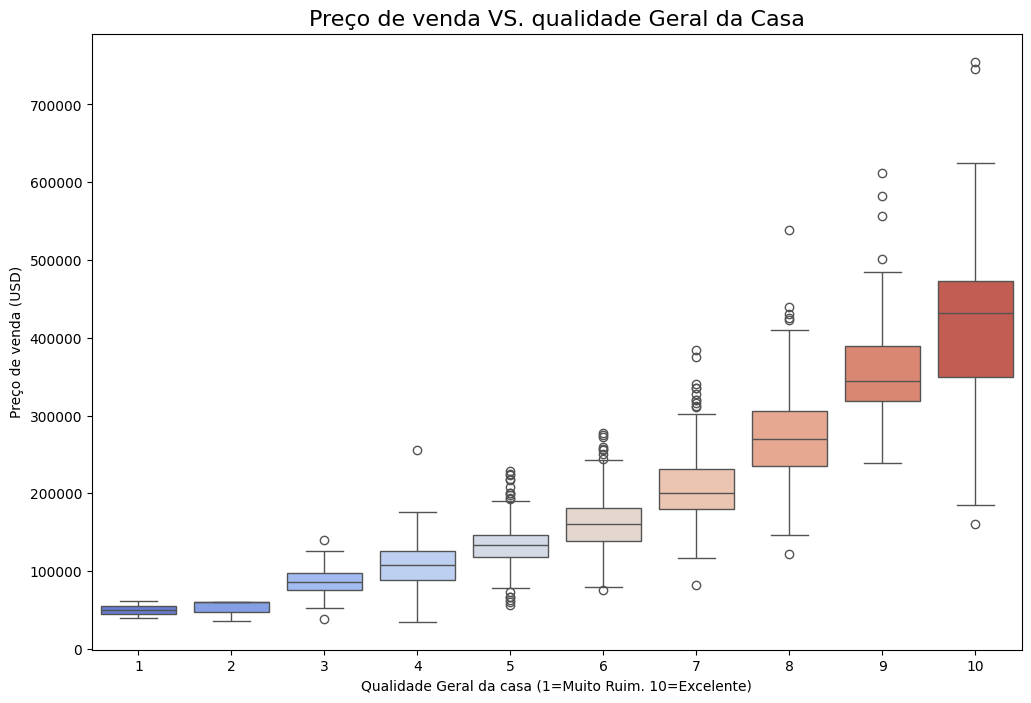

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')
plt.title('Preço de venda VS. qualidade Geral da Casa', fontsize=16)
plt.xlabel('Qualidade Geral da casa (1=Muito Ruim. 10=Excelente)')
plt.ylabel('Preço de venda (USD)')
plt.show()


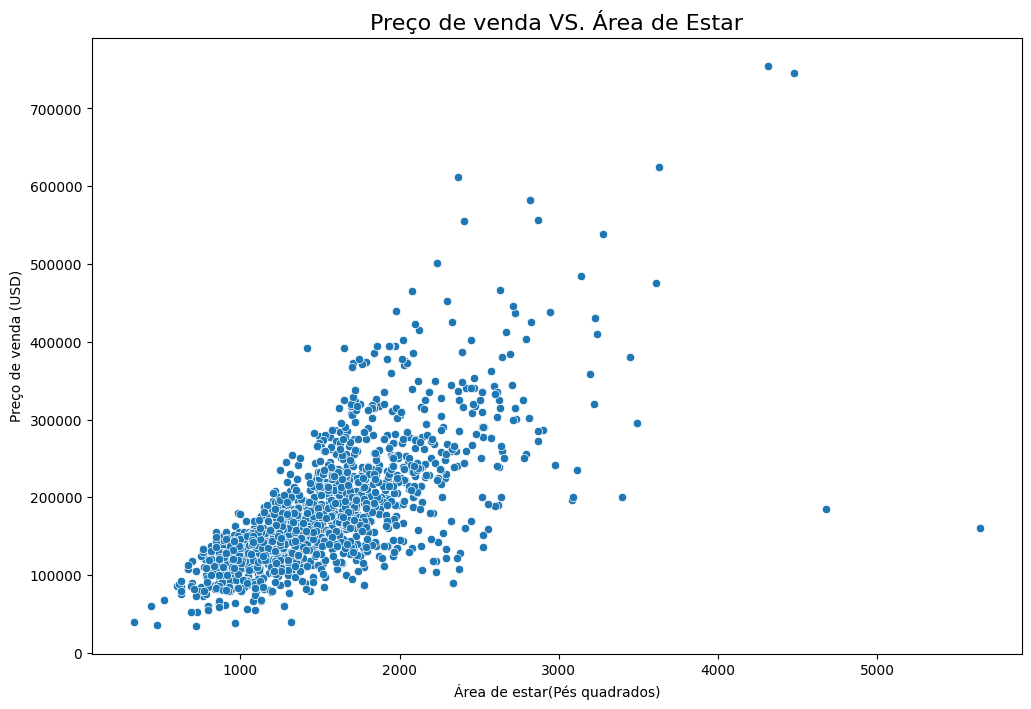

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Preço de venda VS. Área de Estar', fontsize=16)
plt.xlabel('Área de estar(Pés quadrados)')
plt.ylabel('Preço de venda (USD)')
plt.show()

In [20]:
#-------------PREPARANDO O MODELO---------------
features_selecionadas= [
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    'FullBath',
    'YearBuilt'
]

df_modelo = df[features_selecionadas + ['SalePrice']]

print("Verificando dados faltantes nas features selecionadas:")
df_modelo.isnull().sum()

Verificando dados faltantes nas features selecionadas:


,0
OverallQual,0
GrLivArea,0
GarageCars,0
GarageArea,0
TotalBsmtSF,0
FullBath,0
YearBuilt,0
SalePrice,0


In [21]:
from re import X
from sklearn.model_selection import train_test_split

# separando as features do nosso target
X = df_modelo[features_selecionadas]
y = df_modelo['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dados divididos com sucesso!")
print(f"Temos {len(X_train)} casas para treinar o modelo")
print(f"Temos {len(X_test)} casas para testar o modelo")

Dados divididos com sucesso!
Temos 1168 casas para treinar o modelo
Temos 292 casas para testar o modelo


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#criando o modelo de floresta aleatória
modelo = RandomForestRegressor(n_estimators=100, random_state=42)

#Treinando p modelo com os dados de treino
print("Treinando o modelo...(Isso pode levar alguns segundos)")
modelo.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

print("Fazendo previsões nos dados de teste...")
previsoes = modelo.predict(X_test)

mae = mean_absolute_error(y_test, previsoes)

print("---Resultado Final ---")
print(f"O erro absoluto (mae) do nosso modelo é: ${mae:,.2f}")
print("Isso significa que, na média, as previsões dos preços do nosso modelo erram este valor (para mais ou para menos) em relação ao preço real de casa.")

Treinando o modelo...(Isso pode levar alguns segundos)
Modelo treinado com sucesso!
Fazendo previsões nos dados de teste...
---Resultado Final ---
O erro absoluto (mae) do nosso modelo é: $19,534.81
Isso significa que, na média, as previsões dos preços do nosso modelo erram este valor (para mais ou para menos) em relação ao preço real de casa.
